$$\text{
Importing the Necessary Libraries
}
$$

In [1]:
###-----------------
### Import Libraries
###-----------------
import sys


sys.path.append('../')

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay


import tensorflow as tf


from utils.helper import fn_plot_tf_hist


$$\text{
Setting Global Varables
}
$$

In [2]:
###----------------
# Global Variables
###----------------


RANDOM_STATE = 0
np.random.seed(RANDOM_STATE)



TEST_SIZE =  3811 # 18147 - 56*256
ALPHA = 0.001
EPOCHS = 100
BATCH_SIZE = 256

# set location of input files and output files
inpDir = '../input'
outDir = '../output'
modelDir = '../models'
subDir = 'fifa_2019'


# Set plotting parameters
params = {
    'figure.figsize': (15,4),
    'axes.titlesize': 'large',
    'axes.labelsize': 'medium',
    'legend.fontsize': 'medium',
    'xtick.labelsize': 'medium',
    'ytick.labelsize': 'medium',
}
plt.rcParams.update(params)


CMAP = plt.cm.coolwarm
plt.style.use('seaborn-v0_8-darkgrid')




$$\text{
    Loading the data
}
$$

In [3]:
data_df = pd.read_csv(os.path.join(inpDir, 'fifa_2019.csv'), index_col=0)
data_df.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


$$\text{
    Exploratoy Data Analysis 
}
$$

In [4]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18207 entries, 0 to 18206
Data columns (total 88 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        18207 non-null  int64  
 1   Name                      18207 non-null  object 
 2   Age                       18207 non-null  int64  
 3   Photo                     18207 non-null  object 
 4   Nationality               18207 non-null  object 
 5   Flag                      18207 non-null  object 
 6   Overall                   18207 non-null  int64  
 7   Potential                 18207 non-null  int64  
 8   Club                      17966 non-null  object 
 9   Club Logo                 18207 non-null  object 
 10  Value                     18207 non-null  object 
 11  Wage                      18207 non-null  object 
 12  Special                   18207 non-null  int64  
 13  Preferred Foot            18159 non-null  object 
 14  Internation

In [5]:
data_df.isnull().sum()

ID                   0
Name                 0
Age                  0
Photo                0
Nationality          0
                  ... 
GKHandling          48
GKKicking           48
GKPositioning       48
GKReflexes          48
Release Clause    1564
Length: 88, dtype: int64

In [6]:
data_df.duplicated().sum()

0

In [7]:
for col in data_df.columns:
    print(f'{col:<30}: {data_df[col].isnull().sum()}')

ID                            : 0
Name                          : 0
Age                           : 0
Photo                         : 0
Nationality                   : 0
Flag                          : 0
Overall                       : 0
Potential                     : 0
Club                          : 241
Club Logo                     : 0
Value                         : 0
Wage                          : 0
Special                       : 0
Preferred Foot                : 48
International Reputation      : 48
Weak Foot                     : 48
Skill Moves                   : 48
Work Rate                     : 48
Body Type                     : 48
Real Face                     : 48
Position                      : 60
Jersey Number                 : 60
Joined                        : 1553
Loaned From                   : 16943
Contract Valid Until          : 289
Height                        : 48
Weight                        : 48
LS                            : 2085
ST                     

In [8]:
data_df = data_df[data_df['Position'].notnull()]

In [9]:
for col in data_df.columns:
    print(f'{col:<30}: {data_df[col].unique()}')

ID                            : [158023  20801 190871 ... 241638 246268 246269]
Name                          : ['L. Messi' 'Cristiano Ronaldo' 'Neymar Jr' ... 'B. Worman'
 'D. Walker-Rice' 'G. Nugent']
Age                           : [31 33 26 27 32 25 29 28 24 30 19 40 22 23 34 35 36 37 21 18 20 39 41 17
 38 45 42 16 44]
Photo                         : ['https://cdn.sofifa.org/players/4/19/158023.png'
 'https://cdn.sofifa.org/players/4/19/20801.png'
 'https://cdn.sofifa.org/players/4/19/190871.png' ...
 'https://cdn.sofifa.org/players/4/19/241638.png'
 'https://cdn.sofifa.org/players/4/19/246268.png'
 'https://cdn.sofifa.org/players/4/19/246269.png']
Nationality                   : ['Argentina' 'Portugal' 'Brazil' 'Spain' 'Belgium' 'Croatia' 'Uruguay'
 'Slovenia' 'Poland' 'Germany' 'France' 'England' 'Italy' 'Egypt'
 'Colombia' 'Denmark' 'Gabon' 'Wales' 'Senegal' 'Costa Rica' 'Slovakia'
 'Netherlands' 'Bosnia Herzegovina' 'Morocco' 'Serbia' 'Algeria' 'Austria'
 'Greece' 'Chile' 'Swed



ID                   Unique : 18147                 Missing : 0        False
1        False
2        False
3        False
4        False
         ...  
18202    False
18203    False
18204    False
18205    False
18206    False
Name: ID, Length: 18147, dtype: bool


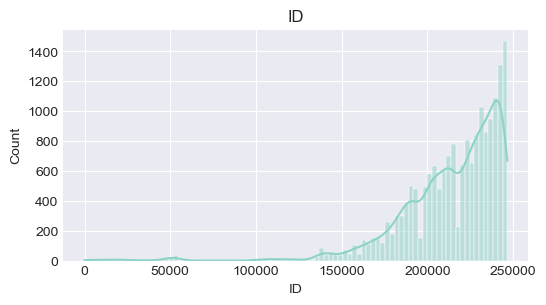



Age                  Unique : 29                    Missing : 0        False
1        False
2        False
3        False
4        False
         ...  
18202    False
18203    False
18204    False
18205    False
18206    False
Name: Age, Length: 18147, dtype: bool


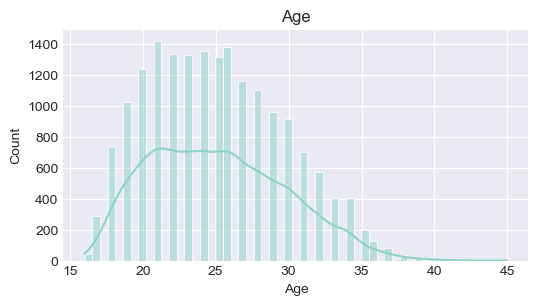



Overall              Unique : 48                    Missing : 0        False
1        False
2        False
3        False
4        False
         ...  
18202    False
18203    False
18204    False
18205    False
18206    False
Name: Overall, Length: 18147, dtype: bool


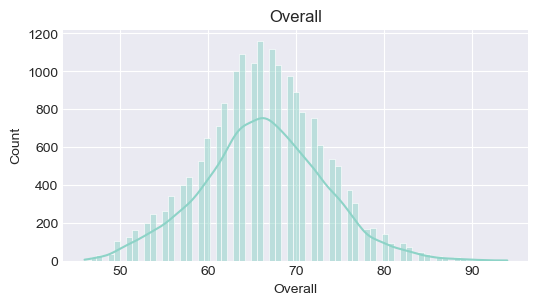



Potential            Unique : 47                    Missing : 0        False
1        False
2        False
3        False
4        False
         ...  
18202    False
18203    False
18204    False
18205    False
18206    False
Name: Potential, Length: 18147, dtype: bool


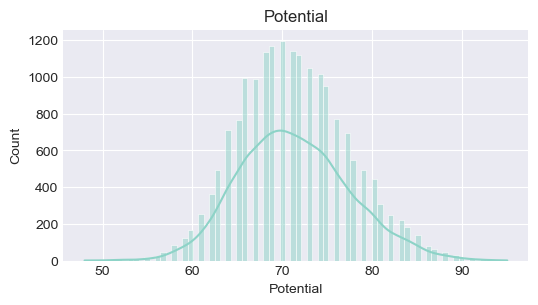



Special              Unique : 1422                  Missing : 0        False
1        False
2        False
3        False
4        False
         ...  
18202    False
18203    False
18204    False
18205    False
18206    False
Name: Special, Length: 18147, dtype: bool


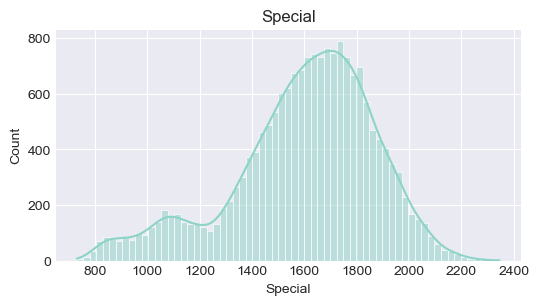



International Reputation Unique : 5                     Missing : 0        False
1        False
2        False
3        False
4        False
         ...  
18202    False
18203    False
18204    False
18205    False
18206    False
Name: International Reputation, Length: 18147, dtype: bool


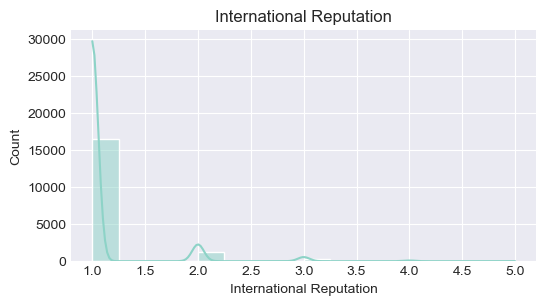



Weak Foot            Unique : 5                     Missing : 0        False
1        False
2        False
3        False
4        False
         ...  
18202    False
18203    False
18204    False
18205    False
18206    False
Name: Weak Foot, Length: 18147, dtype: bool


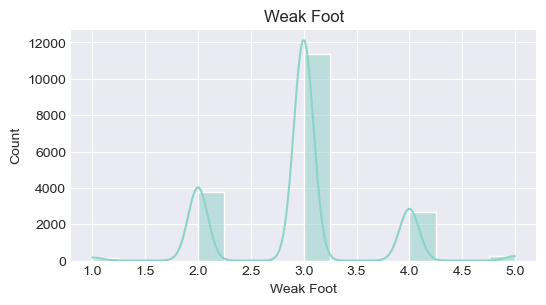



Skill Moves          Unique : 5                     Missing : 0        False
1        False
2        False
3        False
4        False
         ...  
18202    False
18203    False
18204    False
18205    False
18206    False
Name: Skill Moves, Length: 18147, dtype: bool


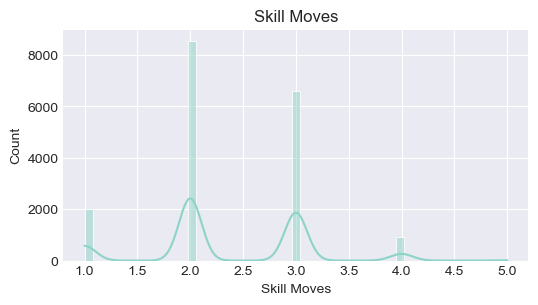



Jersey Number        Unique : 99                    Missing : 0        False
1        False
2        False
3        False
4        False
         ...  
18202    False
18203    False
18204    False
18205    False
18206    False
Name: Jersey Number, Length: 18147, dtype: bool


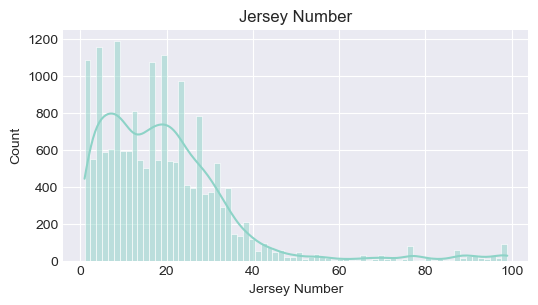



Crossing             Unique : 89                    Missing : 0        False
1        False
2        False
3        False
4        False
         ...  
18202    False
18203    False
18204    False
18205    False
18206    False
Name: Crossing, Length: 18147, dtype: bool


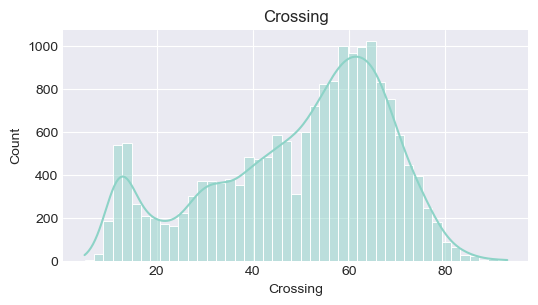



Finishing            Unique : 93                    Missing : 0        False
1        False
2        False
3        False
4        False
         ...  
18202    False
18203    False
18204    False
18205    False
18206    False
Name: Finishing, Length: 18147, dtype: bool


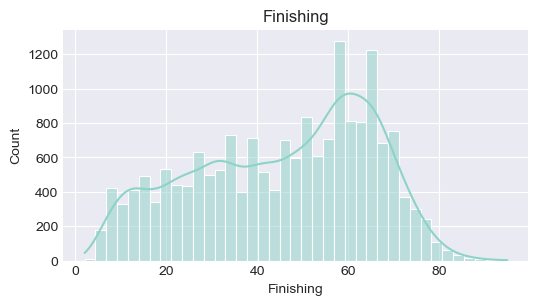



HeadingAccuracy      Unique : 91                    Missing : 0        False
1        False
2        False
3        False
4        False
         ...  
18202    False
18203    False
18204    False
18205    False
18206    False
Name: HeadingAccuracy, Length: 18147, dtype: bool


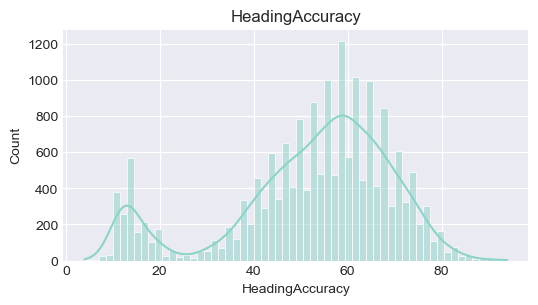



ShortPassing         Unique : 85                    Missing : 0        False
1        False
2        False
3        False
4        False
         ...  
18202    False
18203    False
18204    False
18205    False
18206    False
Name: ShortPassing, Length: 18147, dtype: bool


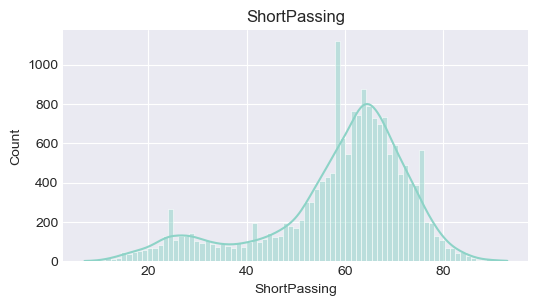



Volleys              Unique : 87                    Missing : 0        False
1        False
2        False
3        False
4        False
         ...  
18202    False
18203    False
18204    False
18205    False
18206    False
Name: Volleys, Length: 18147, dtype: bool


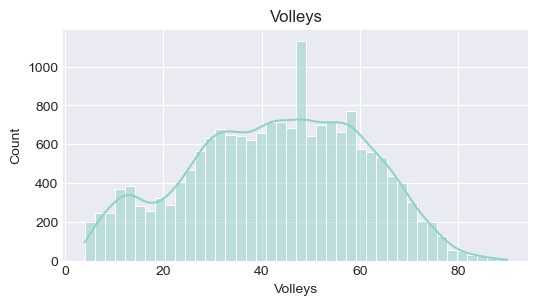



Dribbling            Unique : 94                    Missing : 0        False
1        False
2        False
3        False
4        False
         ...  
18202    False
18203    False
18204    False
18205    False
18206    False
Name: Dribbling, Length: 18147, dtype: bool


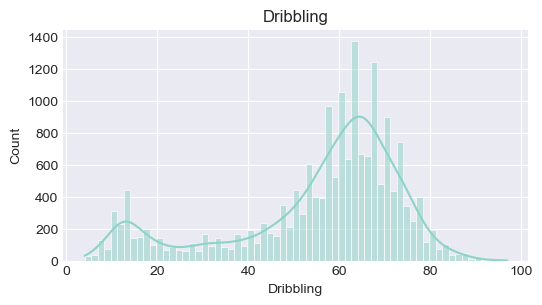



Curve                Unique : 89                    Missing : 0        False
1        False
2        False
3        False
4        False
         ...  
18202    False
18203    False
18204    False
18205    False
18206    False
Name: Curve, Length: 18147, dtype: bool


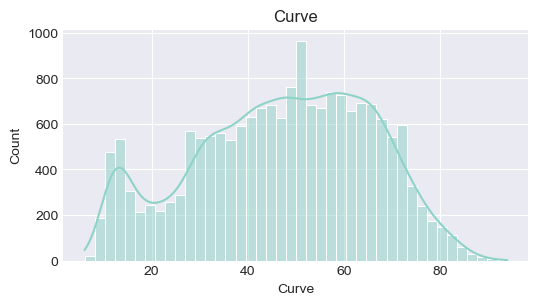



FKAccuracy           Unique : 90                    Missing : 0        False
1        False
2        False
3        False
4        False
         ...  
18202    False
18203    False
18204    False
18205    False
18206    False
Name: FKAccuracy, Length: 18147, dtype: bool


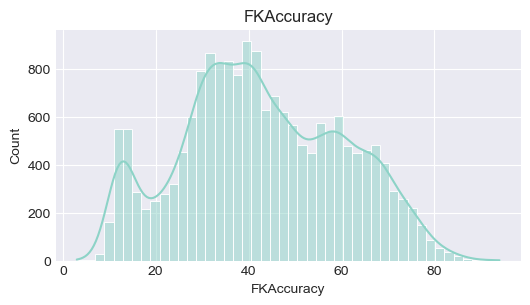



LongPassing          Unique : 84                    Missing : 0        False
1        False
2        False
3        False
4        False
         ...  
18202    False
18203    False
18204    False
18205    False
18206    False
Name: LongPassing, Length: 18147, dtype: bool


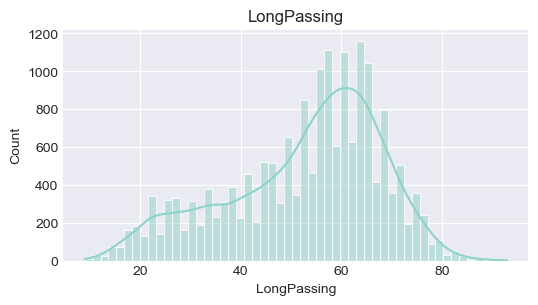



BallControl          Unique : 90                    Missing : 0        False
1        False
2        False
3        False
4        False
         ...  
18202    False
18203    False
18204    False
18205    False
18206    False
Name: BallControl, Length: 18147, dtype: bool


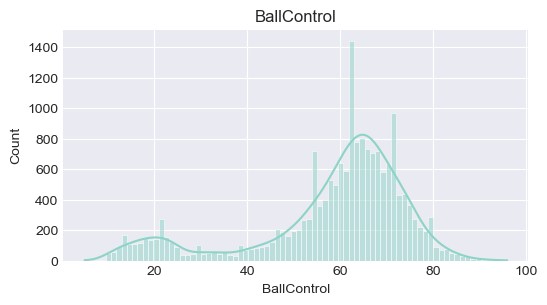



Acceleration         Unique : 86                    Missing : 0        False
1        False
2        False
3        False
4        False
         ...  
18202    False
18203    False
18204    False
18205    False
18206    False
Name: Acceleration, Length: 18147, dtype: bool


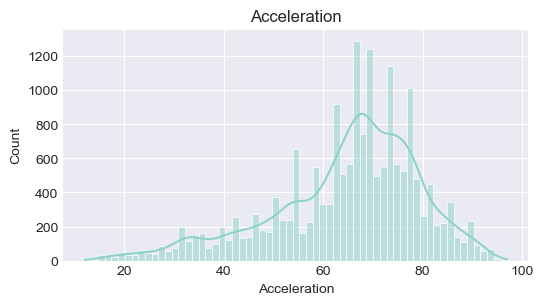



SprintSpeed          Unique : 85                    Missing : 0        False
1        False
2        False
3        False
4        False
         ...  
18202    False
18203    False
18204    False
18205    False
18206    False
Name: SprintSpeed, Length: 18147, dtype: bool


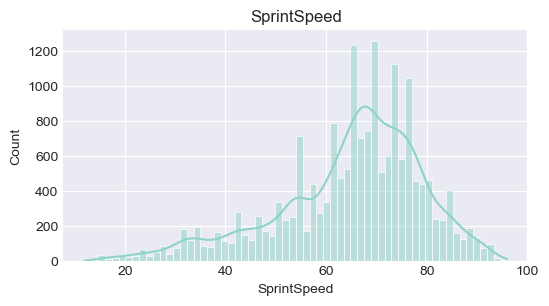



Agility              Unique : 81                    Missing : 0        False
1        False
2        False
3        False
4        False
         ...  
18202    False
18203    False
18204    False
18205    False
18206    False
Name: Agility, Length: 18147, dtype: bool


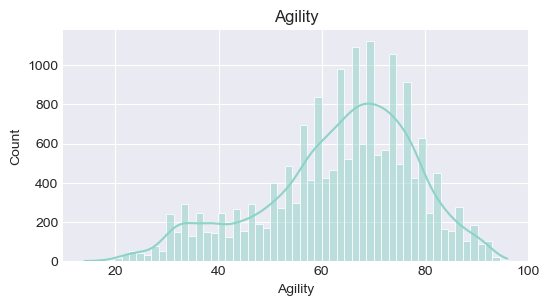



Reactions            Unique : 68                    Missing : 0        False
1        False
2        False
3        False
4        False
         ...  
18202    False
18203    False
18204    False
18205    False
18206    False
Name: Reactions, Length: 18147, dtype: bool


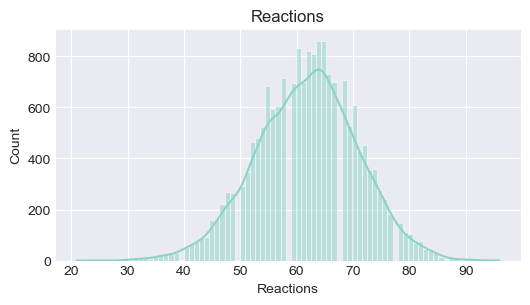



Balance              Unique : 81                    Missing : 0        False
1        False
2        False
3        False
4        False
         ...  
18202    False
18203    False
18204    False
18205    False
18206    False
Name: Balance, Length: 18147, dtype: bool


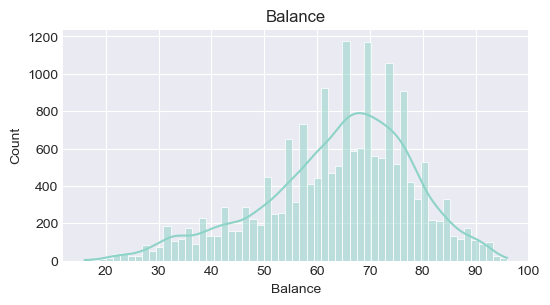



ShotPower            Unique : 92                    Missing : 0        False
1        False
2        False
3        False
4        False
         ...  
18202    False
18203    False
18204    False
18205    False
18206    False
Name: ShotPower, Length: 18147, dtype: bool


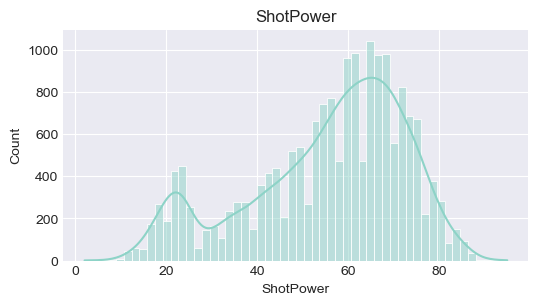



Jumping              Unique : 74                    Missing : 0        False
1        False
2        False
3        False
4        False
         ...  
18202    False
18203    False
18204    False
18205    False
18206    False
Name: Jumping, Length: 18147, dtype: bool


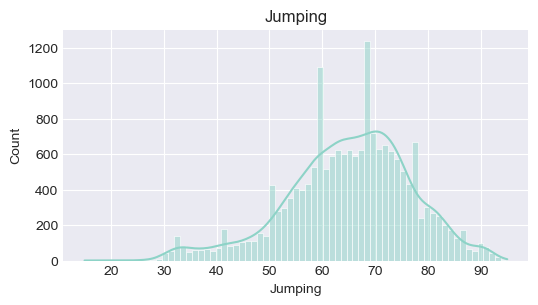



Stamina              Unique : 85                    Missing : 0        False
1        False
2        False
3        False
4        False
         ...  
18202    False
18203    False
18204    False
18205    False
18206    False
Name: Stamina, Length: 18147, dtype: bool


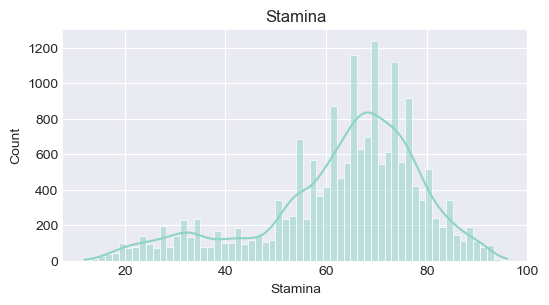



Strength             Unique : 74                    Missing : 0        False
1        False
2        False
3        False
4        False
         ...  
18202    False
18203    False
18204    False
18205    False
18206    False
Name: Strength, Length: 18147, dtype: bool


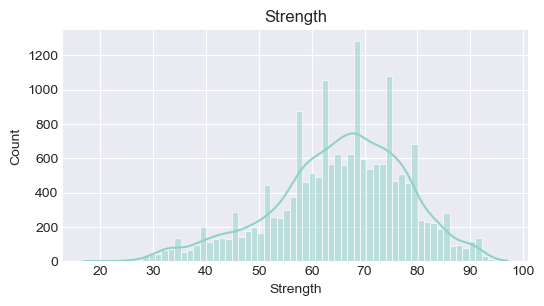



LongShots            Unique : 92                    Missing : 0        False
1        False
2        False
3        False
4        False
         ...  
18202    False
18203    False
18204    False
18205    False
18206    False
Name: LongShots, Length: 18147, dtype: bool


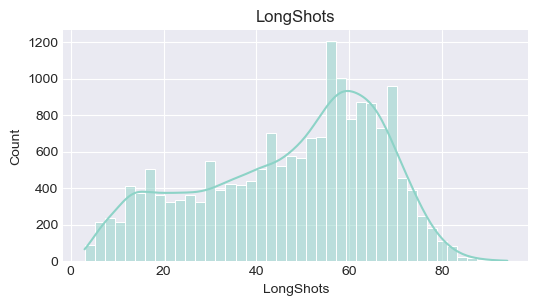



Aggression           Unique : 85                    Missing : 0        False
1        False
2        False
3        False
4        False
         ...  
18202    False
18203    False
18204    False
18205    False
18206    False
Name: Aggression, Length: 18147, dtype: bool


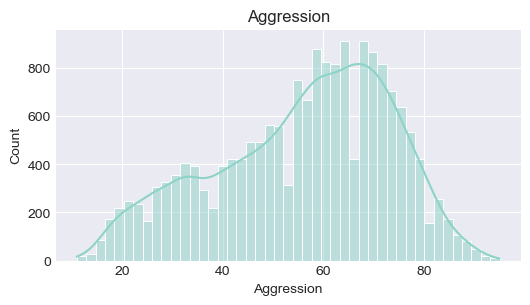



Interceptions        Unique : 89                    Missing : 0        False
1        False
2        False
3        False
4        False
         ...  
18202    False
18203    False
18204    False
18205    False
18206    False
Name: Interceptions, Length: 18147, dtype: bool


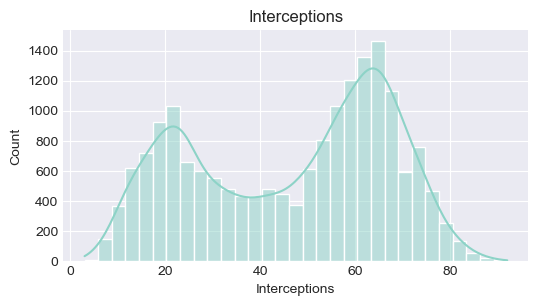



Positioning          Unique : 94                    Missing : 0        False
1        False
2        False
3        False
4        False
         ...  
18202    False
18203    False
18204    False
18205    False
18206    False
Name: Positioning, Length: 18147, dtype: bool


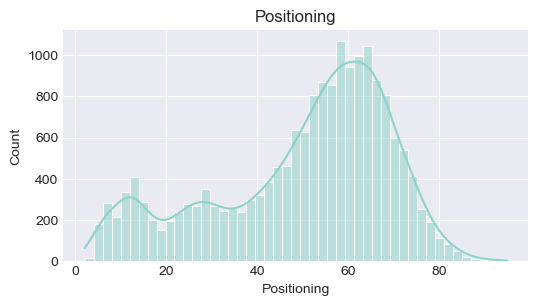



Vision               Unique : 85                    Missing : 0        False
1        False
2        False
3        False
4        False
         ...  
18202    False
18203    False
18204    False
18205    False
18206    False
Name: Vision, Length: 18147, dtype: bool


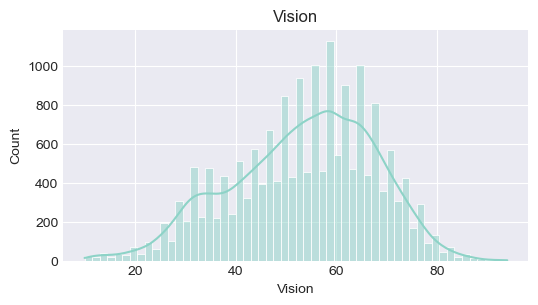



Penalties            Unique : 87                    Missing : 0        False
1        False
2        False
3        False
4        False
         ...  
18202    False
18203    False
18204    False
18205    False
18206    False
Name: Penalties, Length: 18147, dtype: bool


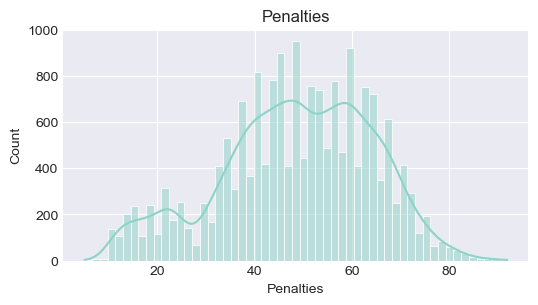



Composure            Unique : 84                    Missing : 0        False
1        False
2        False
3        False
4        False
         ...  
18202    False
18203    False
18204    False
18205    False
18206    False
Name: Composure, Length: 18147, dtype: bool


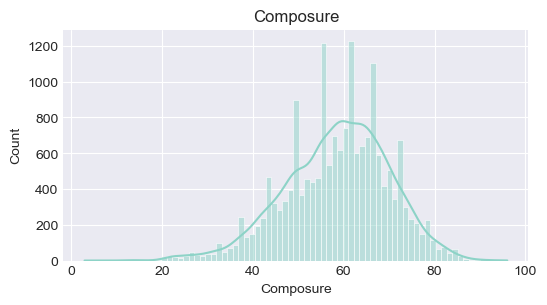



Marking              Unique : 92                    Missing : 0        False
1        False
2        False
3        False
4        False
         ...  
18202    False
18203    False
18204    False
18205    False
18206    False
Name: Marking, Length: 18147, dtype: bool


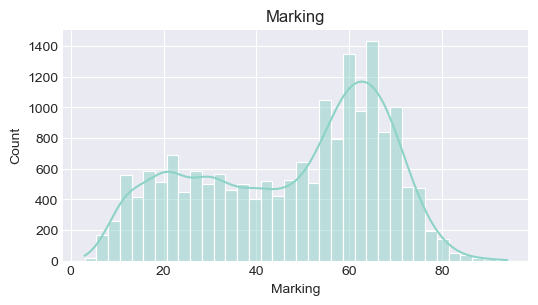



StandingTackle       Unique : 90                    Missing : 0        False
1        False
2        False
3        False
4        False
         ...  
18202    False
18203    False
18204    False
18205    False
18206    False
Name: StandingTackle, Length: 18147, dtype: bool


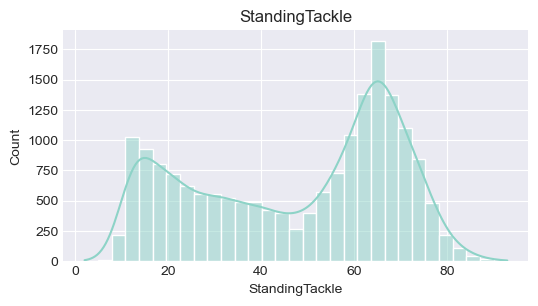



SlidingTackle        Unique : 88                    Missing : 0        False
1        False
2        False
3        False
4        False
         ...  
18202    False
18203    False
18204    False
18205    False
18206    False
Name: SlidingTackle, Length: 18147, dtype: bool


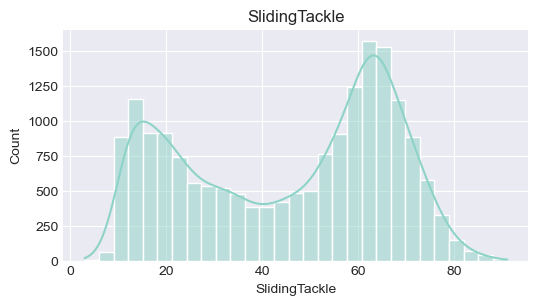



GKDiving             Unique : 71                    Missing : 0        False
1        False
2        False
3        False
4        False
         ...  
18202    False
18203    False
18204    False
18205    False
18206    False
Name: GKDiving, Length: 18147, dtype: bool


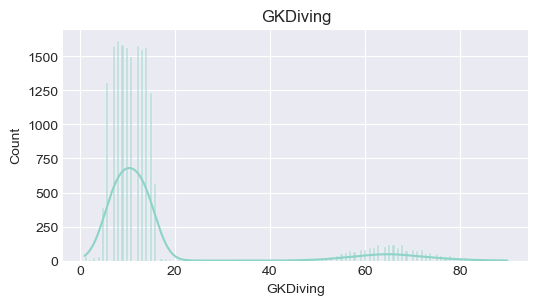



GKHandling           Unique : 70                    Missing : 0        False
1        False
2        False
3        False
4        False
         ...  
18202    False
18203    False
18204    False
18205    False
18206    False
Name: GKHandling, Length: 18147, dtype: bool


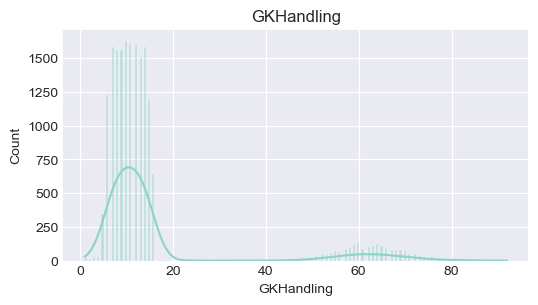



GKKicking            Unique : 79                    Missing : 0        False
1        False
2        False
3        False
4        False
         ...  
18202    False
18203    False
18204    False
18205    False
18206    False
Name: GKKicking, Length: 18147, dtype: bool


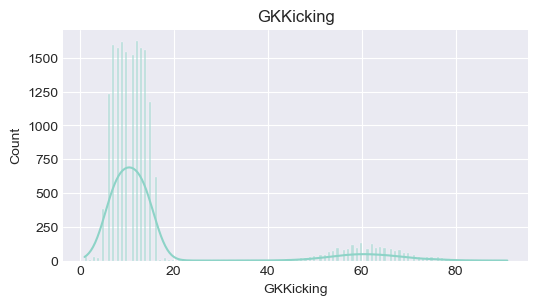



GKPositioning        Unique : 79                    Missing : 0        False
1        False
2        False
3        False
4        False
         ...  
18202    False
18203    False
18204    False
18205    False
18206    False
Name: GKPositioning, Length: 18147, dtype: bool


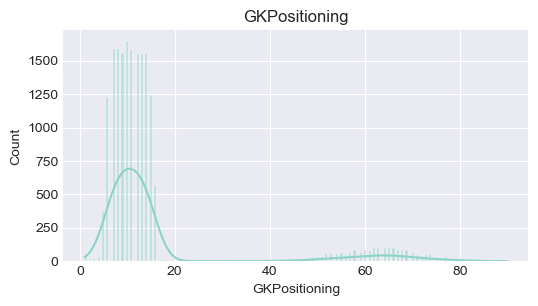



GKReflexes           Unique : 76                    Missing : 0        False
1        False
2        False
3        False
4        False
         ...  
18202    False
18203    False
18204    False
18205    False
18206    False
Name: GKReflexes, Length: 18147, dtype: bool


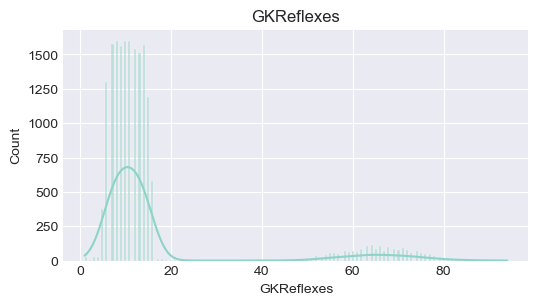

In [10]:
numerical_cols = data_df.select_dtypes(include=['int64', 'float64']).columns
for col in numerical_cols: 
    print(f'\n\n{col:<20} Unique : {len(data_df[col].unique()):<20}  Missing : {data_df[col].isnull()}')
    plt.figure(figsize=(6, 3))
    sns.histplot(data_df[col], kde=True)
    plt.title(col)
    plt.show()



Name                 Unique : 17140                 Missing : 0        False
1        False
2        False
3        False
4        False
         ...  
18202    False
18203    False
18204    False
18205    False
18206    False
Name: Name, Length: 18147, dtype: bool


Photo                Unique : 18147                 Missing : 0        False
1        False
2        False
3        False
4        False
         ...  
18202    False
18203    False
18204    False
18205    False
18206    False
Name: Photo, Length: 18147, dtype: bool


Nationality          Unique : 164                   Missing : 0        False
1        False
2        False
3        False
4        False
         ...  
18202    False
18203    False
18204    False
18205    False
18206    False
Name: Nationality, Length: 18147, dtype: bool


Flag                 Unique : 164                   Missing : 0        False
1        False
2        False
3        False
4        False
         ...  
18202    False
18203    False
1820

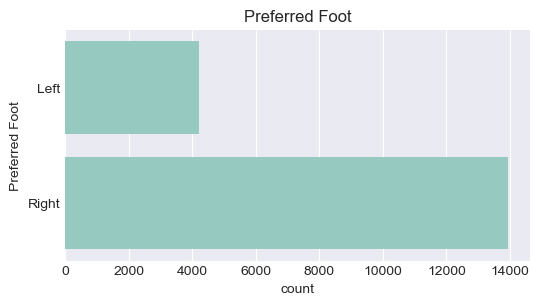



Work Rate            Unique : 9                     Missing : 0        False
1        False
2        False
3        False
4        False
         ...  
18202    False
18203    False
18204    False
18205    False
18206    False
Name: Work Rate, Length: 18147, dtype: bool


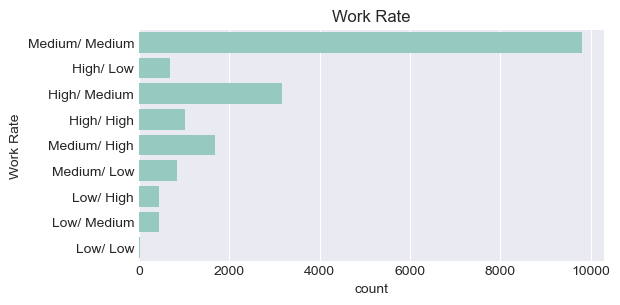



Body Type            Unique : 10                    Missing : 0        False
1        False
2        False
3        False
4        False
         ...  
18202    False
18203    False
18204    False
18205    False
18206    False
Name: Body Type, Length: 18147, dtype: bool


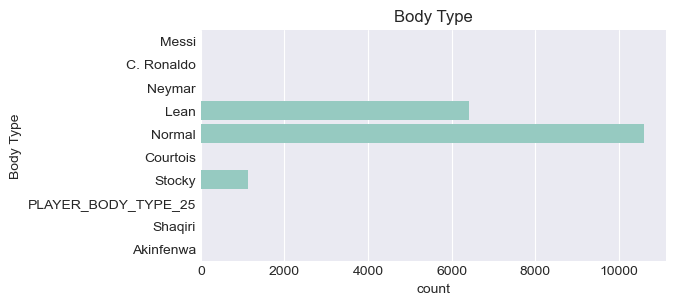



Real Face            Unique : 2                     Missing : 0        False
1        False
2        False
3        False
4        False
         ...  
18202    False
18203    False
18204    False
18205    False
18206    False
Name: Real Face, Length: 18147, dtype: bool


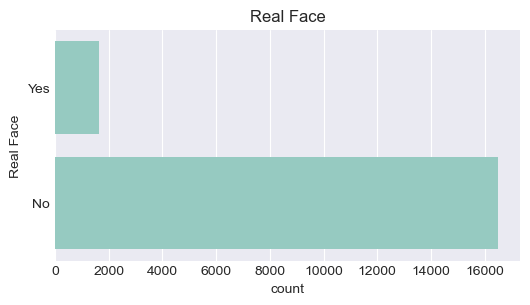



Position             Unique : 27                    Missing : 0        False
1        False
2        False
3        False
4        False
         ...  
18202    False
18203    False
18204    False
18205    False
18206    False
Name: Position, Length: 18147, dtype: bool


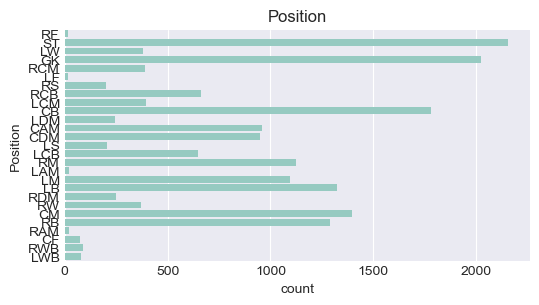



Joined               Unique : 1737                  Missing : 0        False
1        False
2        False
3        False
4        False
         ...  
18202    False
18203    False
18204    False
18205    False
18206    False
Name: Joined, Length: 18147, dtype: bool


Loaned From          Unique : 342                   Missing : 0        True
1        True
2        True
3        True
4        True
         ... 
18202    True
18203    True
18204    True
18205    True
18206    True
Name: Loaned From, Length: 18147, dtype: bool


Contract Valid Until Unique : 37                    Missing : 0        False
1        False
2        False
3        False
4        False
         ...  
18202    False
18203    False
18204    False
18205    False
18206    False
Name: Contract Valid Until, Length: 18147, dtype: bool


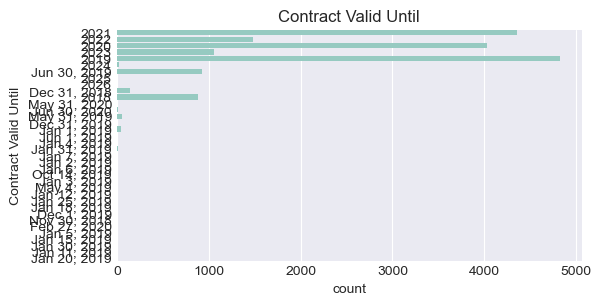



Height               Unique : 21                    Missing : 0        False
1        False
2        False
3        False
4        False
         ...  
18202    False
18203    False
18204    False
18205    False
18206    False
Name: Height, Length: 18147, dtype: bool


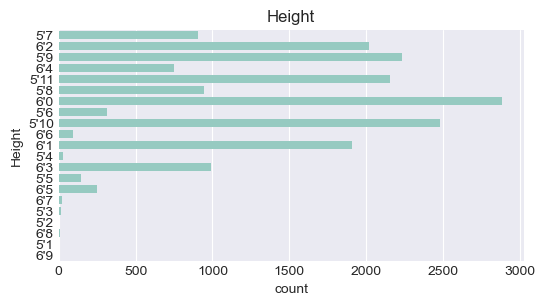



Weight               Unique : 57                    Missing : 0        False
1        False
2        False
3        False
4        False
         ...  
18202    False
18203    False
18204    False
18205    False
18206    False
Name: Weight, Length: 18147, dtype: bool


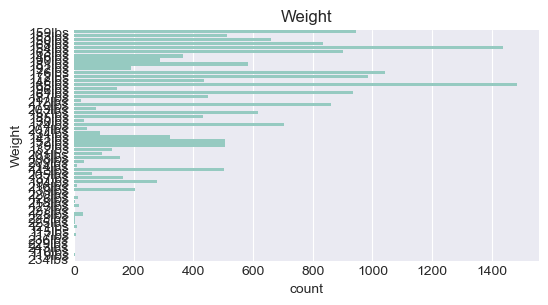



LS                   Unique : 94                    Missing : 0        False
1        False
2        False
3         True
4        False
         ...  
18202    False
18203    False
18204    False
18205    False
18206    False
Name: LS, Length: 18147, dtype: bool


ST                   Unique : 94                    Missing : 0        False
1        False
2        False
3         True
4        False
         ...  
18202    False
18203    False
18204    False
18205    False
18206    False
Name: ST, Length: 18147, dtype: bool


RS                   Unique : 94                    Missing : 0        False
1        False
2        False
3         True
4        False
         ...  
18202    False
18203    False
18204    False
18205    False
18206    False
Name: RS, Length: 18147, dtype: bool


LW                   Unique : 106                   Missing : 0        False
1        False
2        False
3         True
4        False
         ...  
18202    False
18203    False
18204    False
182

In [11]:
categorical_cols = data_df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f'\n\n{col:<20} Unique : {len(data_df[col].unique()):<20}  Missing : {data_df[col].isnull()}')
    if len(data_df[col].unique()) > 65:
        continue
    plt.figure(figsize=(6, 3))
    sns.countplot(data_df[col])
    plt.title(col)
    plt.show()

$$\text{
    Selecting only necessary features
}
$$

In [12]:
redundant_cols = [
    'ID','Name', 'Body Type','Photo','Flag','LS','ST','RS','LW','LF',
    'CF','RF','RW','LAM','CAM','RAM','LM','LCM','CM','RCM','RM','LWB',
    'LDM','CDM','RDM','RWB','LB','LCB','CB','RCB','RB','Club','Club Logo',
    'Special','Real Face','Jersey Number','Joined','Loaned From',
    'Contract Valid Until','Release Clause', 'Nationality','Value', 
    'Wage', 'Preferred Foot', 'Work Rate',	'Height','Weight'
]
new_data_df = data_df.drop(columns=redundant_cols)
new_data_df.columns.sort_values()

Index(['Acceleration', 'Age', 'Aggression', 'Agility', 'Balance',
       'BallControl', 'Composure', 'Crossing', 'Curve', 'Dribbling',
       'FKAccuracy', 'Finishing', 'GKDiving', 'GKHandling', 'GKKicking',
       'GKPositioning', 'GKReflexes', 'HeadingAccuracy', 'Interceptions',
       'International Reputation', 'Jumping', 'LongPassing', 'LongShots',
       'Marking', 'Overall', 'Penalties', 'Position', 'Positioning',
       'Potential', 'Reactions', 'ShortPassing', 'ShotPower', 'Skill Moves',
       'SlidingTackle', 'SprintSpeed', 'Stamina', 'StandingTackle', 'Strength',
       'Vision', 'Volleys', 'Weak Foot'],
      dtype='object')

In [13]:
new_data_df.isna().sum()

Age                         0
Overall                     0
Potential                   0
International Reputation    0
Weak Foot                   0
Skill Moves                 0
Position                    0
Crossing                    0
Finishing                   0
HeadingAccuracy             0
ShortPassing                0
Volleys                     0
Dribbling                   0
Curve                       0
FKAccuracy                  0
LongPassing                 0
BallControl                 0
Acceleration                0
SprintSpeed                 0
Agility                     0
Reactions                   0
Balance                     0
ShotPower                   0
Jumping                     0
Stamina                     0
Strength                    0
LongShots                   0
Aggression                  0
Interceptions               0
Positioning                 0
Vision                      0
Penalties                   0
Composure                   0
Marking   

$$\text{
    Excoding the labels onto integer with reducing the total number of labels to 4.
}
$$

In [14]:
new_data_df['Position'].unique()

array(['RF', 'ST', 'LW', 'GK', 'RCM', 'LF', 'RS', 'RCB', 'LCM', 'CB',
       'LDM', 'CAM', 'CDM', 'LS', 'LCB', 'RM', 'LAM', 'LM', 'LB', 'RDM',
       'RW', 'CM', 'RB', 'RAM', 'CF', 'RWB', 'LWB'], dtype=object)

In [15]:
new_data_df['Position'].unique()


map_obj = {
    'goalkeeper' : ['GK'],
    'forward': ['ST', 'LW', 'RW', 'LF', 'RF','RS','LS','CF'],
    'midfielders': ['CM','RCM','LCM','CDM','RDM','LDM','CAM','LAM','RAM','RM','LM'],
    'defenders': ['CB','RCB','LCB','LWB','RWB','LB','RB',],
}

class_labels = {i : list(map_obj.keys())[i] for i in range(len(map_obj.keys()))}


for i in range(len(map_obj.keys())):
    new_data_df.loc[new_data_df['Position'].isin(map_obj[list(map_obj.keys())[i]]), 'Position'] = i
    

new_data_df['Position'] = pd.to_numeric(new_data_df['Position'], downcast='integer')

new_data_df['Position'].unique()

array([1, 0, 2, 3], dtype=int8)

$$\text{
    Extracting Features and Labels
}
$$

In [40]:
X = new_data_df.drop('Position',axis=1)
y = new_data_df['Position'].to_numpy()

$$\text{
    Train Test Split
}
$$

In [17]:
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    stratify = y, 
    test_size=TEST_SIZE,
    random_state=RANDOM_STATE
)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((14336, 40), (3811, 40), (14336,), (3811,))

$$\text{
    Scaling the Dataset
}
$$

In [18]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

$$
\text{
Converting to dataset for batch processing instead of all data training at once
}
$$

In [19]:
train_ds = tf.data.Dataset.from_tensor_slices((X_train,y_train))
test_ds = tf.data.Dataset.from_tensor_slices((X_test,y_test))

type(train_ds), type(test_ds)

(tensorflow.python.data.ops.from_tensor_slices_op._TensorSliceDataset,
 tensorflow.python.data.ops.from_tensor_slices_op._TensorSliceDataset)

$$
\text{
    Converting the data to a tensor dataset using Preprocessing and Batching
}
$$

In [20]:
train_ds = train_ds.shuffle(buffer_size = X_train.shape[0]).batch(BATCH_SIZE)
test_ds = test_ds.shuffle(buffer_size = X_test.shape[0]).batch(BATCH_SIZE)

In [21]:
train_ds = train_ds.cache().prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=tf.data.AUTOTUNE)

In [ ]:
# ONly for testing
next(iter(train_ds))

(<tf.Tensor: shape=(256, 40), dtype=float64, numpy=
 array([[ 1.68572825,  0.6919318 , -0.05089094, ..., -0.31891881,
         -0.14024112, -0.3734979 ],
        [-0.88229536, -0.61386188,  0.76336407, ..., -0.37961767,
         -0.49325917, -0.09485747],
        [ 1.04372235, -0.61386188, -1.51654996, ..., -0.6224131 ,
         -0.2579138 , -0.65213833],
        ...,
        [ 1.04372235, -0.32368551, -1.19084796, ..., -0.1975211 ,
         -0.19907746, -0.09485747],
        [ 1.68572825, -0.75895007, -1.67940096, ...,  3.01951838,
          2.86041234,  2.58009064],
        [-0.24028946, -0.03350914, -0.21374194, ..., -0.68311196,
         -0.49325917, -0.48495407]])>,
 <tf.Tensor: shape=(256,), dtype=int8, numpy=
 array([3, 1, 3, 2, 1, 3, 3, 1, 2, 2, 3, 3, 1, 2, 1, 1, 3, 1, 3, 3, 3, 3,
        2, 3, 3, 3, 2, 2, 1, 1, 0, 2, 1, 2, 1, 2, 2, 2, 2, 3, 1, 2, 2, 1,
        2, 3, 2, 0, 3, 3, 1, 1, 3, 1, 0, 3, 2, 3, 2, 3, 2, 1, 3, 2, 1, 3,
        2, 1, 3, 2, 3, 2, 3, 3, 2, 1, 0, 2, 3, 3, 2,

$$\text{
    Creating the model
}
$$

In [ ]:
in_len = X_train.shape[1]
out_len = len(new_data_df['Position'].unique())

model = tf.keras.Sequential([
    tf.keras.Input(shape=(in_len,), name = 'input'), 
    tf.keras.layers.Dense(18, activation = 'leaky_relu', name = 'fc_1'), 
    tf.keras.layers.Dense(out_len, name = 'output')
])

In [24]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ fc_1 (Dense)                    │ (None, 18)             │           738 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 4)              │            76 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 814 (3.18 KB)

 Trainable params: 814 (3.18 KB)

 Non-trainable params: 0 (0.00 B)

$$\text{
    Creating the loss function for the model
}
$$

In [25]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True)

In [26]:
prediction = model(X_train).numpy().sum()

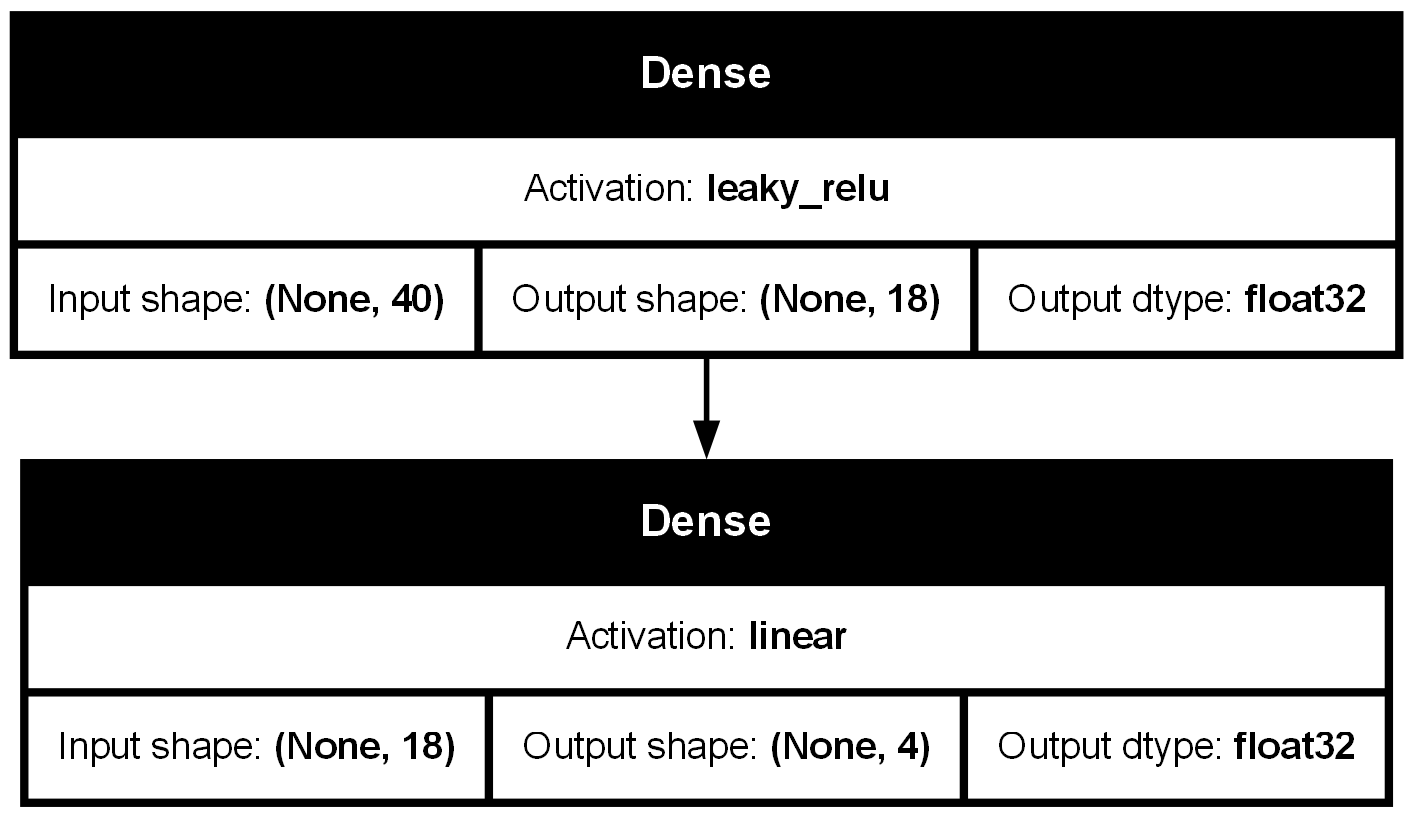

In [27]:
tf.keras.utils.plot_model(
    model, 
    os.path.join(outDir, 'multilayer_fifa.png'),
    show_shapes=True, 
    show_dtype=True, 
    show_layer_activations=True
)

$$\text{
    Compiling the model
}
$$

In [28]:
optimizer = tf.keras.optimizers.Adam(learning_rate = ALPHA)
model.compile(
    optimizer = optimizer,
    loss = loss_fn,
    metrics = ['accuracy']
)

$$\text{
    Fitting the model
}
$$

In [29]:
history = model.fit(
    train_ds, 
    validation_data = test_ds,
    batch_size = BATCH_SIZE,
    verbose = 1,
    epochs =EPOCHS
)

Epoch 1/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.2649 - loss: 1.4135 - val_accuracy: 0.6660 - val_loss: 0.8113
Epoch 2/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7065 - loss: 0.7354 - val_accuracy: 0.7951 - val_loss: 0.5519
Epoch 3/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8033 - loss: 0.5201 - val_accuracy: 0.8302 - val_loss: 0.4396
Epoch 4/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8349 - loss: 0.4276 - val_accuracy: 0.8415 - val_loss: 0.3885
Epoch 5/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8480 - loss: 0.3853 - val_accuracy: 0.8494 - val_loss: 0.3606
Epoch 6/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8579 - loss: 0.3604 - val_accuracy: 0.8570 - val_loss: 0.3424
Epoch 7/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8631 - loss: 0.3440 - val_accuracy: 0.8641 - val_loss: 0.3292
Epoch 8/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8675 - loss: 0.3318 - val_accuracy: 0.8688 - v

$$\text{
    Getting history and Plotting Accuracy and Loss Graphs
}
$$

,accuracy,loss,val_accuracy,val_loss
0,0.424735,1.159284,0.665967,0.811348
1,0.744350,0.664776,0.795067,0.551928
2,0.816267,0.489576,0.830228,0.439621


,accuracy,loss,val_accuracy,val_loss
97,0.895438,0.253921,0.885332,0.262500
98,0.895438,0.253735,0.885070,0.262478
99,0.895578,0.253579,0.885332,0.262436


<Axes: >

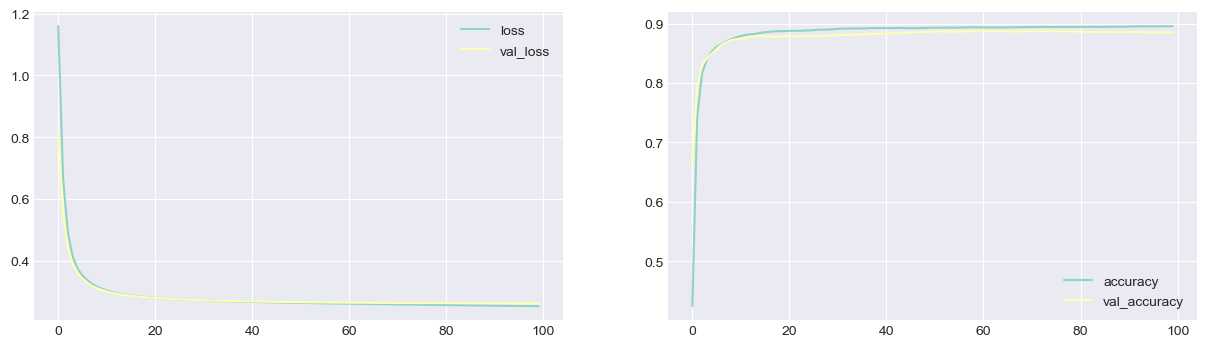

In [30]:
hist_df = pd.DataFrame(history.history) 
display(hist_df.head(3))
display(hist_df.tail(3))
fig, axes = plt.subplots(1,2)
hist_df.plot(y=['loss', 'val_loss'], ax= axes[0])
hist_df.plot(y=['accuracy', 'val_accuracy'], ax = axes[1])

In [31]:
pd.DataFrame(history.history)

,accuracy,loss,val_accuracy,val_loss
0,0.424735,1.159284,0.665967,0.811348
1,0.744350,0.664776,0.795067,0.551928
2,0.816267,0.489576,0.830228,0.439621
3,0.840053,0.412412,0.841511,0.388549
4,0.852260,0.374555,0.849383,0.360595
...,...,...,...,...
95,0.895159,0.254255,0.885070,0.262509
96,0.895159,0.254058,0.885070,0.262551
97,0.895438,0.253921,0.885332,0.262500
98,0.895438,0.253735,0.885070,0.262478


$$\text{
Creating the Prediction Model
}
$$

In [32]:
prediction_model = tf.keras.Sequential([
    model,
    tf.keras.layers.Softmax()
])
prediction_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (None, 4)              │           814 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ softmax (Softmax)               │ (None, 4)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 814 (3.18 KB)

 Trainable params: 814 (3.18 KB)

 Non-trainable params: 0 (0.00 B)


$$
\text{
    If train dataframe is avaliable the only perform following steps 
}
$$

In [33]:
y_pred = model.predict(X_train)
accuracy_score(y_true= y_train, y_pred = y_pred.argmax(axis=1))

448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


0.8955775669642857

$$
\text{
Train Data Accuracy and Confusion Matrix
}
$$

In [34]:
y_true, y_pred = [], []
for count, data in enumerate(train_ds):
    feat, label = data
    pred = prediction_model(feat).numpy().argmax(axis=1)
    y_true.extend(label)
    y_pred.extend(pred)
    
len(y_true), len(y_pred)

(14336, 14336)

In [35]:
from sklearn.metrics import classification_report


print(classification_report(y_true=y_true, y_pred=y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1600
           1       0.88      0.77      0.82      2700
           2       0.84      0.90      0.87      5402
           3       0.94      0.93      0.94      4634

    accuracy                           0.90     14336
   macro avg       0.91      0.90      0.91     14336
weighted avg       0.90      0.90      0.90     14336



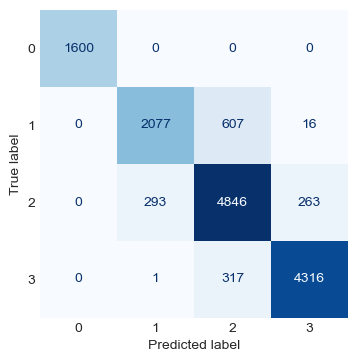

In [36]:
cm = confusion_matrix(y_true=y_true, y_pred= y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=class_labels)
fig,ax = plt.subplots(figsize=(4,4))
disp.plot(ax=ax, cmap= 'Blues', colorbar = False)
ax.grid(False)

$$
\text{
Test Data Accuracy and Confusion Matrix
}
$$

In [37]:
y_true, y_pred = [], []
for count, data in enumerate(test_ds):
    feat, label = data
    pred = prediction_model(feat).numpy().argmax(axis=1)
    y_true.extend(label)
    y_pred.extend(pred)
    
len(y_true), len(y_pred)

(3811, 3811)

In [38]:
accuracy_score(y_true=y_true, y_pred=y_pred)

0.8853319338756231

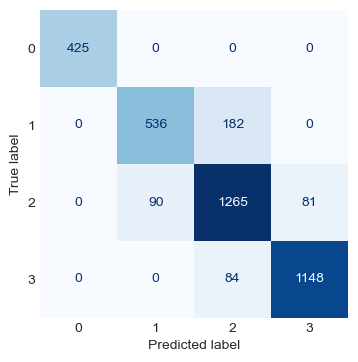

In [39]:
cm = confusion_matrix(y_true=y_true, y_pred= y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=class_labels)
fig,ax = plt.subplots(figsize=(4,4))
disp.plot(ax=ax, cmap= 'Blues', colorbar = False)
ax.grid(False)